In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize





In [2]:

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_excel('Childsurvey.xlsx', sheet_name='Sheet1')

In [4]:
df.head()

,Timestamp,Name of Child,Age,Date of Birth,Class (बच्चे की कक्षा),Background of the Child,Problems in Home,Behavioral Impact,Academic Performance,Family Income,Role models,Reason for such role model,Column 13
0,27020225 10:32:31,Aayush,13.0,20100211,7,Single Mother parent,Financial,Lack of Attention,6,6000,Acting,Peonal choice,NaN
1,22020225 14:32:30,Mo Rihan,9.0,2080216,4,Labour,Family,Lack of Confidence,5,10000,Acting,खेसारी लाल यादव (उनकी एक्टिंग पसन्द है)\nएक्टि...,NaN
2,24020225 13:57:49,Vansh sharma,12.0,17070212,5,Poor \n,Financial,Lack of Confidence.,4,16000,Acting,Inspired by his acting,NaN
3,24020225 13:08:31,Ishika pal,8.0,21100216,3,Middle class,Health,No effect,8,20000,Acting,\nShe likes dance,NaN
4,27020225 12:05:26,Sangita kumari,11.0,1010215,3,Labour,Fight,Lack of Attention,5,15000,Acting,Acts and dances well,NaN


In [5]:
# Load data and show columns

print("Available columns in the Excel file:")
print(df.columns.tolist())

Available columns in the Excel file:
['Timestamp', 'Name of Child ', 'Age', 'Date of Birth', 'Class (बच्चे की कक्षा)', 'Background of the Child ', 'Problems in Home ', 'Behavioral Impact', 'Academic Performance ', 'Family Income ', 'Role models', 'Reason for such role model ', 'Column 13']


In [6]:
if 'Column 13' in df.columns:
    df = df.drop(['Column 13'], axis=1)
df.head()

,Timestamp,Name of Child,Age,Date of Birth,Class (बच्चे की कक्षा),Background of the Child,Problems in Home,Behavioral Impact,Academic Performance,Family Income,Role models,Reason for such role model
0,27020225 10:32:31,Aayush,13.0,20100211,7,Single Mother parent,Financial,Lack of Attention,6,6000,Acting,Peonal choice
1,22020225 14:32:30,Mo Rihan,9.0,2080216,4,Labour,Family,Lack of Confidence,5,10000,Acting,खेसारी लाल यादव (उनकी एक्टिंग पसन्द है)\nएक्टि...
2,24020225 13:57:49,Vansh sharma,12.0,17070212,5,Poor \n,Financial,Lack of Confidence.,4,16000,Acting,Inspired by his acting
3,24020225 13:08:31,Ishika pal,8.0,21100216,3,Middle class,Health,No effect,8,20000,Acting,\nShe likes dance
4,27020225 12:05:26,Sangita kumari,11.0,1010215,3,Labour,Fight,Lack of Attention,5,15000,Acting,Acts and dances well


In [7]:
if 'Timestamp' in df.columns and 'Date of Birth' in df.columns:
    df = df.drop(['Timestamp', 'Date of Birth'], axis=1)
df.head()

,Name of Child,Age,Class (बच्चे की कक्षा),Background of the Child,Problems in Home,Behavioral Impact,Academic Performance,Family Income,Role models,Reason for such role model
0,Aayush,13.0,7,Single Mother parent,Financial,Lack of Attention,6,6000,Acting,Peonal choice
1,Mo Rihan,9.0,4,Labour,Family,Lack of Confidence,5,10000,Acting,खेसारी लाल यादव (उनकी एक्टिंग पसन्द है)\nएक्टि...
2,Vansh sharma,12.0,5,Poor \n,Financial,Lack of Confidence.,4,16000,Acting,Inspired by his acting
3,Ishika pal,8.0,3,Middle class,Health,No effect,8,20000,Acting,\nShe likes dance
4,Sangita kumari,11.0,3,Labour,Fight,Lack of Attention,5,15000,Acting,Acts and dances well


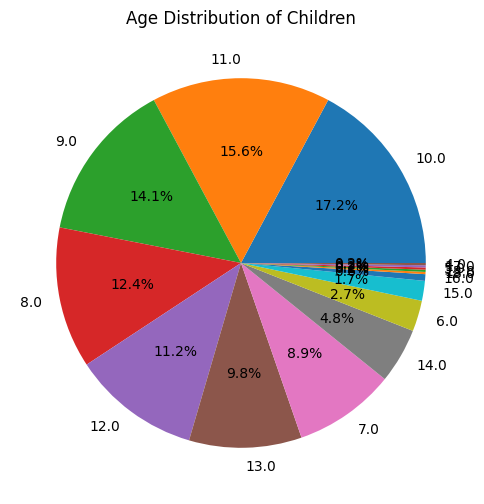

In [8]:
age_counts = df['Age'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Age Distribution of Children')
plt.show()

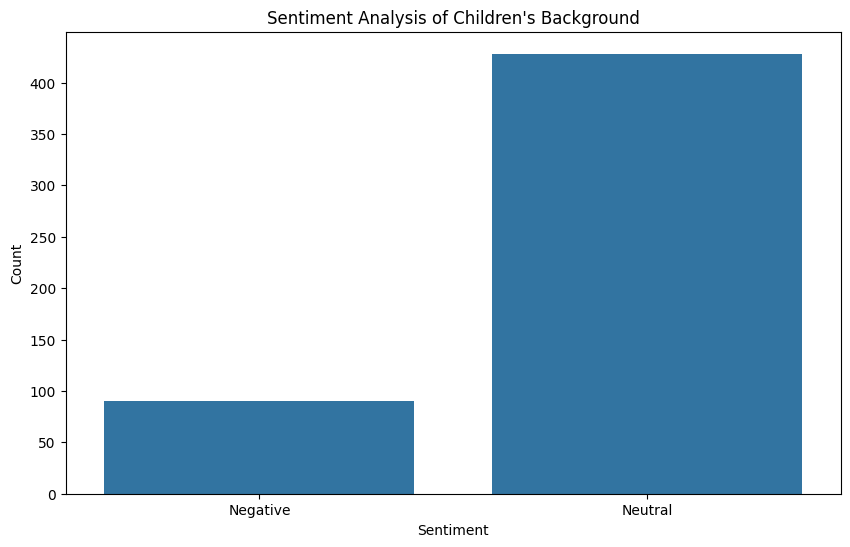


Sentiment Distribution:
sentiment
Neutral     428
Negative     90
Name: count, dtype: int64

Average Sentiment Score: -0.064

Detailed Results:

Child: Aayush 
Background: Single Mother parent 
Sentiment Score: -0.071
Sentiment: Negative

Child: Mo Rihan
Background: Labour
Sentiment Score: 0.000
Sentiment: Neutral

Child: Vansh sharma
Background: Poor 

Sentiment Score: -0.400
Sentiment: Negative

Child: Ishika pal
Background: Middle class
Sentiment Score: 0.000
Sentiment: Neutral

Child: Sangita kumari
Background: Labour
Sentiment Score: 0.000
Sentiment: Neutral


In [9]:




# Function to clean text
def clean_text(text):
    if pd.isna(text):
        return ""
    # Convert to string and lowercase
    text = str(text).lower()
    # Remove special characters and digits
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Function for sentiment analysis
def get_sentiment(text):
    cleaned_text = clean_text(text)
    if not cleaned_text:
        return 0
    return TextBlob(cleaned_text).sentiment.polarity

# Apply sentiment analysis to Background of the Child column
df['sentiment_score'] = df['Background of the Child '].apply(get_sentiment)
df['sentiment'] = df['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# Visualize the results
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Analysis of Children's Background")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Display the sentiment distribution
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())

# Display average sentiment score
print(f"\nAverage Sentiment Score: {df['sentiment_score'].mean():.3f}")

# Display detailed results
print("\nDetailed Results:")
for idx, row in df[['Name of Child ', 'Background of the Child ', 'sentiment_score', 'sentiment']].head().iterrows():
    print(f"\nChild: {row['Name of Child ']}")
    print(f"Background: {row['Background of the Child ']}")
    print(f"Sentiment Score: {row['sentiment_score']:.3f}")
    print(f"Sentiment: {row['sentiment']}")



In [10]:
# Clean and standardize the text for true unique values in 'Behavioral Impact'
unique_backgrounds = df['Behavioral Impact'].dropna().apply(
    lambda x: str(x).strip().lower()
).unique()

# Remove duplicates, sort, and capitalize for neat display
cleaned_unique_backgrounds = sorted(set(unique_backgrounds))

# Print the cleaned unique backgrounds
print("Cleaned Unique Background Descriptions:")
for idx, value in enumerate(cleaned_unique_backgrounds, start=1):
    print(f"{idx}. {value.capitalize()}")


Cleaned Unique Background Descriptions:
1. Aggresive
2. Lack in confidence
3. Lack of attandance
4. Lack of attendance
5. Lack of attention
6. Lack of confidence
7. Lack of confidence.
8. Lack of confidenceक
9. Little effect
10. Nan
11. Nan prabhav daltai hai
12. No effect
13. No effect.
14. Parivar ka mahaul samanya hai parivarik mahan aur paristhitiyan bacche ke prerak samvad batchit karne ki kshamta aur sampurn vyavhar ko achcha prabhavit kar rahi hai
15. Parivar ki prusthbhoomi ka prabhav padta hai
16. Parivarik mahaul bhi bacche ke sikhane ki ruchi per  bahut prabhav dalte hain
17. Parivarik mahaul se bacche ki prerna kaksha mein bhagidari batchit karne ki kshamta aur sampurn vyavhar ko samanya prabhavit karti hai aur koi vishesh prabhav nahin padta
18. Parivarik mahaul shaikshik hai baccha har kshetra mein bhagidari karta hai
19. Parivarik mahol ka bacche ke jivan per bahut prabhav padta hai shikshit mata pita bacche ka pura dhyan rakhte hain aur uske padhaai per bhi dhyan dete h

In [11]:
# Clean and standardize the text for true unique values in 'Role models'
unique_role_models = df['Role models'].dropna().apply(
    lambda x: str(x).strip().lower()
).unique()

# Remove duplicates, sort, and capitalize for display
cleaned_unique_role_models = sorted(set(unique_role_models))

# Print the cleaned unique role models
print("Cleaned Unique Role Models:")
for idx, value in enumerate(cleaned_unique_role_models, start=1):
    print(f"{idx}. {value.capitalize()}")


Cleaned Unique Role Models:
1. Acting
2. Advocate
3. Air hostess
4. Army
5. Artist
6. Bank
7. Beautician
8. Business
9. Chef
10. Civil service
11. Civil services
12. Dancer
13. Doctor
14. Engineer
15. Guardian
16. Lawyer
17. Not yet decided
18. Police
19. Politician
20. Scientist
21. Singer
22. Singer .
23. Sports
24. Teacher
25. Youtuber
